C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


NameError: name 'x' is not defined

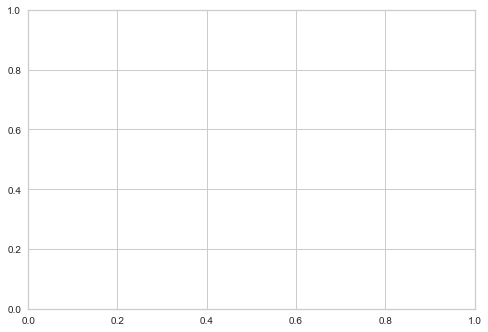

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold
#
cv = StratifiedKFold(4)
param_range = np.arange(3, 20, 2)

viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

# Fit and show the visualizer
viz.fit(x, y)
viz.show()